# Regression with Bayesian Approach

In this experient, we are goint to study the different methods to classify Iris dataset

In [46]:
%matplotlib inline

In [64]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn import svm

## EDA

In [38]:
iris = load_iris()
data = iris.data
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [42]:
df = pd.DataFrame(data, columns=['sepal_length','sepal_width', 'petal_length', 'petal_width'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


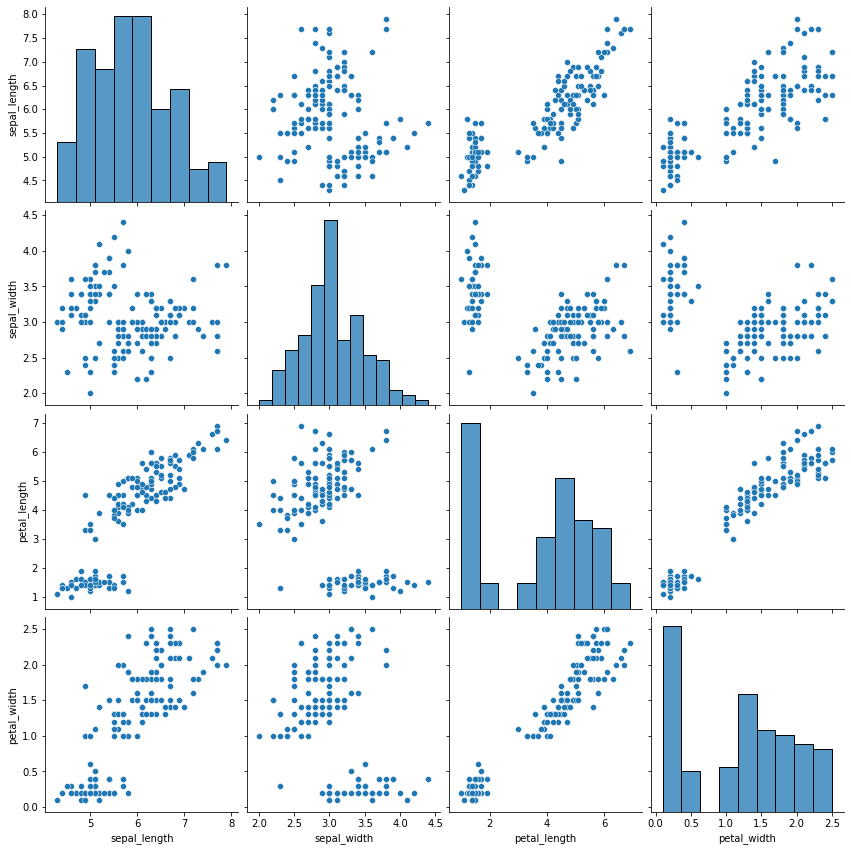

In [50]:
sns.pairplot(df,height=3);

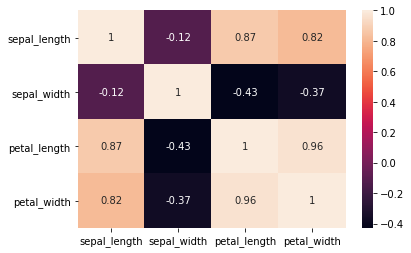

In [49]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Experiment

In [19]:
# Constant
SEED = 42
SPLIT = 0.5

In [20]:
# load data
X, y = load_iris(return_X_y=True)
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-SPLIT, random_state=SEED)

In [59]:
# Logistic Regression
logreg = LogisticRegression(C=1e5)

In [60]:
logreg.fit(X_train, y_train)

/home/ubuntu/anaconda3/envs/alert/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred = logreg.predict(X_test)

In [62]:
print("Logistic Regression Accuracy %.4f" % (1-(y_test != y_pred).sum()/X_test.shape[0]))

Logistic Regression Accuracy 0.9600


In [21]:
# Gaussian Naive Bayes
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [36]:
print("Gaussian Naive Bayes Classifier Accuracy %.4f" % (1-(y_test != y_pred).sum()/X_test.shape[0]))

Gaussian Naive Bayes Classifier Accuracy 0.9867


In [65]:
# Multinomial Naive Bayes classifier
mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)

In [66]:
print("multinomial Naive Bayes classifier Accuracy %.4f" % (1-(y_test != y_pred).sum()/X_test.shape[0]))

multinomial Naive Bayes classifier Accuracy 0.9733


In [76]:
# Linear Support Vector Classification
clf = svm.LinearSVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)

/home/ubuntu/anaconda3/envs/alert/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [77]:
print("Support Vector Machines Accuracy %.4f" % (1-(y_test != y_pred).sum()/X_test.shape[0]))

Support Vector Machines Accuracy 0.9867
